In [322]:
import cv2
import numpy as np
from PIL import Image
import sys
sys.path.append('../..')
from core import *
from utils import *
cmap = np.genfromtxt('../../cmap.csv', delimiter=',')
#kernel = np.ones((5,5),np.float32)/25

### RGB Image

In [323]:
img = cv2.imread('../../../../../Downloads/RGB.png')
img = cv2.GaussianBlur(img,(5,5),0)
#print(img.shape)
[b, g, r] = channelSplit(img)
r = np.asarray(r.T[0]).astype(float).T
b = np.asarray(b.T[0]).astype(float).T
g = np.asarray(g.T[0]).astype(float).T

### NGB Image

In [324]:
img2 = cv2.imread('../../../../../Downloads/NGB.png')
img2 = cv2.GaussianBlur(img2,(5,5),0)
#print(img.shape)
[b2, g2, r2] = channelSplit(img2)
r2 = np.asarray(r2.T[0]).astype(float).T
b2= np.asarray(b2.T[0]).astype(float).T
g2 = np.asarray(g2.T[0]).astype(float).T
print("MIN\t R\t G\t B")
print("RGB\t", np.min(r), "\t", np.min(g), "\t", np.min(b))
print("NGB\t", np.min(r2), "\t", np.min(g2), "\t", np.min(b2))
print("\nMAX\t R\t G\t B")
print("RGB\t", np.max(r), "\t", np.max(g), "\t", np.max(b))
print("NGB\t", np.max(r2), "\t", np.max(g2), "\t", np.max(b2))
print("\nMEAN\t R\t G\t B")
print("RGB\t", np.mean(r, dtype=int), "\t", np.mean(g, dtype=int), "\t", np.mean(b, dtype=int))
print("NGB\t", np.mean(r2, dtype=int), "\t", np.mean(g2, dtype=int), "\t", np.mean(b2, dtype=int))


MIN	 R	 G	 B
RGB	 18.0 	 15.0 	 8.0
NGB	 35.0 	 24.0 	 26.0

MAX	 R	 G	 B
RGB	 239.0 	 236.0 	 236.0
NGB	 235.0 	 236.0 	 235.0

MEAN	 R	 G	 B
RGB	 89 	 85 	 77
NGB	 100 	 95 	 81


### Histograms

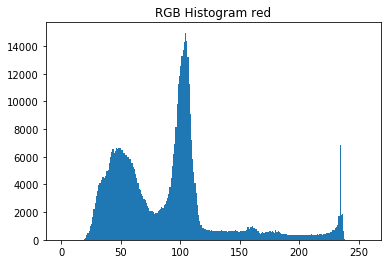

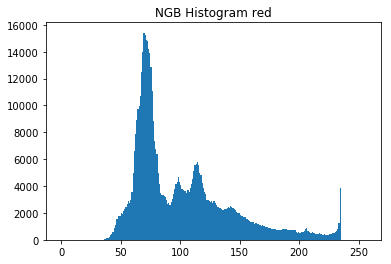

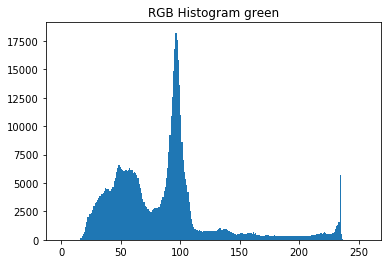

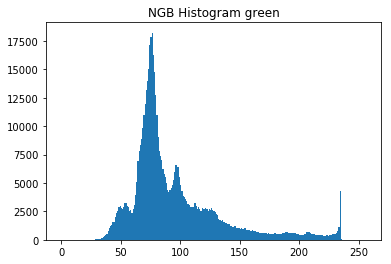

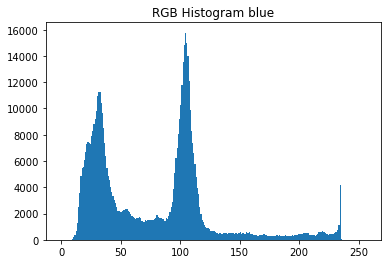

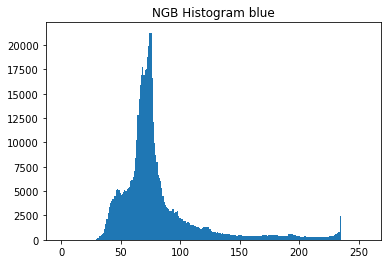

In [325]:
plt.hist(r.ravel(),256,[0,256]); plt.title('RGB Histogram red'); plt.show()
plt.hist(r2.ravel(),256,[0,256]); plt.title('NGB Histogram red'); plt.show()
plt.hist(g.ravel(),256,[0,256]); plt.title('RGB Histogram green'); plt.show()
plt.hist(g2.ravel(),256,[0,256]); plt.title('NGB Histogram green'); plt.show()
plt.hist(b.ravel(),256,[0,256]); plt.title('RGB Histogram blue'); plt.show()
plt.hist(b2.ravel(),256,[0,256]); plt.title('NGB Histogram blue'); plt.show()

### Compute NDVI

In [346]:
nir = b2
denom = nir+r
denom[denom<=0] = 0.0001
ndvi = (nir-r) / denom
min_ndvi = np.min(ndvi)
ndvi = ((ndvi-min_ndvi) * 255) / 2
ndvi = np.around(ndvi).astype('uint8')
print(np.max(ndvi), np.min(ndvi))

197 0


### Colormap and Save

In [347]:
RGB = np.empty_like([r,g,b])
ret = cmap[ndvi].astype('uint8')
Image.fromarray(ret).save('../Images/real1.jpg')
#showImage(ret, 10000)

In [316]:
#reconstruct original RGN img
newimg = np.empty(img.shape, 'uint8')
newimg[...,0] = r2
newimg[...,1] = g2
newimg[...,2] = b2
Image.fromarray(newimg).save('../Images/t2_blue_recon.jpg')

In [321]:
help (cv2.bilateralFilter)

Help on built-in function bilateralFilter:

bilateralFilter(...)
    bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
    .   @brief Applies the bilateral filter to an image.
    .   
    .   The function applies bilateral filtering to the input image, as described in
    .   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
    .   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
    .   very slow compared to most filters.
    .   
    .   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
    .   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
    .   strong effect, making the image look "cartoonish".
    .   
    .   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
    .   applications, and perhaps d=9 for offline applicatio